# Flugpreis Vorhersage - Kaufen oder Warten?
## Projektarbeit Data Mining
___
### Wintersemester 2021/22
### Gruppe G:
Max Grundmann - s0559326
### Inhalte
1. Problemanalyse
2. Explorative Datenanalyse
3. Weitere Features
4. Praktische Überlegungen
___
## 1. Problemanalyse

### Daten
Grundlage für diese Projektarbeit bilden die bereitgestellten Daten zu Flugpreisen zwischen London Stansted und Berlin Schönefeld sowie zwischen London Standsted und Frankfurt. 

### Ziel des Projekts
Ziel des Models ist es, für einen gegebenen Flug an einem gegebenen Anfrage-Datum eine Empfehlung auszusprechen, ob es sich lohnt auf einen niedrigeren Preis zu warten oder ob es besser wäre, das Ticket sofort zu kaufen, da der Preis vorraussichtlich nur weiter steigen wird. 

### Lösungsansatz
Im Anschluss an die explorative Datenanalyse soll mit Hilfe eines Machine Learning Modells die Problemstellung gelöst werden. Das Problem kann dabei entweder als binäres Klassifikationsproblem oder als Regressionsproblem des künftigen Kaufpreises betrachtet werden. Kapitel 4 gibt dazu einen Ausblick, welches Verfahren aus geschäftlicher Sicht vorteilhafter sein könnte. 

---
## 2. Explorative Datenanalyse

### Vorhandene Spalten
Request_Date: Datum/Zeit der Preisanfrage

Flight_Date: Datum des Flugs

Departure_hour: Gerundete Abflugszeit

flight_unique_id: eindeutige ID für den Flug

route_abb: Abkürzung der Route

Price_In_Eur: Flugpreis

min_future_price_in_Eur: minimaler Flugpreis für die flight_unique_id über alle zukünftigen Request_Dates

buy: 1 = kaufen, 0 = warten 

### Datenvorbereitung

Benötigte Bibliotheken laden.

In [187]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

Daten laden. Im eingereichten Notebook basieren alle Auswertungen auf dem Trainingsdatensatz. Sie können selbstverständlich auch analog für den Test-Datensatz ausgeführt werden.

In [188]:
data = pd.read_csv('train_set.csv', index_col=0)
data['Flight_Date'] = pd.to_datetime(data['Flight_Date'])
data['Request_Date'] = pd.to_datetime(data['Request_Date'])

In [189]:
data.head()

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,Price_In_Eur,min_future_price_in_Eur,buy
index,,,,,,,,
1,2019-06-03 11:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,208.07,259.07,1
2,2019-06-03 23:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
3,2019-06-04 11:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
4,2019-06-04 23:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
5,2019-06-03 11:00:00+00:00,2019-06-05,21,2019-06-05 FR 147,STN-SXF,143.86,251.72,1


In [190]:
data.shape

(83624, 8)

Der Testdatensatz enthält zwei Spalten weniger, da die Spalten min_future_price_in_Eur und buy für die Vorhersage nicht zur Verfügung stehen.

In [191]:
data.describe(include='all')

C:\Users\Max\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
C:\Users\Max\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,Price_In_Eur,min_future_price_in_Eur,buy
count,83624,83624,83624.000000,83624,83624,83624.000000,83624.000000,83624.000000
unique,123,98,NaN,1007,4,NaN,NaN,NaN
top,2019-06-04 23:00:00+00:00,2019-08-26 00:00:00,NaN,2019-08-15 FR 1687,SXF-STN,NaN,NaN,NaN
freq,996,1474,NaN,123,27592,NaN,NaN,NaN
first,2019-06-03 11:00:00+00:00,2019-06-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-08-03 11:00:00+00:00,2019-09-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,12.969889,NaN,NaN,71.965080,56.593014,0.223835
std,NaN,NaN,6.177936,NaN,NaN,54.788483,46.126909,0.416815
min,NaN,NaN,6.000000,NaN,NaN,8.990000,8.990000,0.000000
25%,NaN,NaN,7.000000,NaN,NaN,32.770000,22.270000,0.000000


#### Request_Date
Es gab Anfragen zu 123 verschiedenen Zeitpunkten zwischen dem 03.06.2019 23 Uhr und dem 03.08.2019 11 Uhr.
Der Zeitpunkt 04.06.2019 um 23 Uhr kommt mit 996 Anfragen am Häufigsten vor. 

#### Flight_Date
Es gab Anfragen zu 98 verschiedenen Flug-Zeitpunkten zwischen dem 05.06.2019 5 Uhr und dem 10.09.2019 10 Uhr.
Der Zeitpunkt 26.08.2019 um 0 Uhr kommt mit 1474 Anfragen am Häufigsten vor. 

#### flight_unique_id
Der Datensatz enthält insgesamt 1007 einzigartige Flugverbindungen.

#### Departure_hour
Es sind nur Flüge  zwischen 6 und 22 Uhr erfasst. => Nachtflugverbot in Frankfurt (zwischen 23 und 5 Uhr, https://www.fnp.de/frankfurt/flughafen-frankfurt-nachtflugverbot-massnahme-gegen-fluglaerm-13545950.html) und London Stansted <bv> "Stansted airport is and has always been a 24 hour operation. There are restrictions on the numbers and types or aircraft that are allowed to operate between the hours of 23:30-06:00 hours (local time). This bans the noisier type of aircraft operating at night." (https://www.stanstedairport.com/community/noise/frequently-asked-questions/). <br><br>
50% aller Flüge starten vor 10 Uhr morgens, nur 25% aller Flüge fliegen nach 19 Uhr oder vor 7 Uhr. 
    
#### Price_in_Eur & min_future_price_in_Eur
Der durchschnittliche Ticketpreis beträgt rund 72€ für den Zeitpunkt der Abfrage und durchschnittlich 57€ bei den zukünftigen Preisen. 75% aller Tickets kosten zum Zeitpunkt der Abfrage weniger als 92€ / 74€. 

#### buy
Ein Durchschnitt von 0,22 lässt darauf schließen, dass es in den meisten Fällen vorteilhafter ist mit dem Kauf zu warten (0).

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83624 entries, 1 to 83624
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Request_Date             83624 non-null  datetime64[ns, UTC]
 1   Flight_Date              83624 non-null  datetime64[ns]     
 2   Departure_hour           83624 non-null  int64              
 3   flight_unique_id         83624 non-null  object             
 4   route_abb                83624 non-null  object             
 5   Price_In_Eur             83624 non-null  float64            
 6   min_future_price_in_Eur  83624 non-null  float64            
 7   buy                      83624 non-null  int64              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 5.7+ MB


Der Datensatz enthält keine Null-Werte, die Datentypen sind bereits gepflegt.

Datensatz auf Duplikate prüfen:

In [193]:
print("Anzahl Duplikate (über alle Spalten):", sum(data.duplicated()))
print("Anzahl Duplikate flight_unique_id + Request_Date:", sum(data[['flight_unique_id', 'Request_Date']].duplicated()))

Anzahl Duplikate (über alle Spalten): 0
Anzahl Duplikate flight_unique_id + Request_Date: 0


Erkenntnis: Es existieren keine generellen Duplikate, allerdings gibt es häufig mehrere Abfragen zu dem selben Flug.

Zusätzliche Spalte als Differenz zwischen min_future_price_in_Eur und Price_In_Eur berechnen. Außerdem wird die Differenz zum abgefragten Preis in Prozent errechnet. Damit kann ausgewertet werden, wie hoch die prozentuale Ersparnis durch warten sein kann.

In [194]:
data['Price_Diff'] = data['min_future_price_in_Eur'] - data['Price_In_Eur']
data['Price_Diff_%'] = (data['Price_Diff'] / data['Price_In_Eur'])
data[['Price_In_Eur', 'min_future_price_in_Eur', 'Price_Diff', 'Price_Diff_%']].describe(include='all')

,Price_In_Eur,min_future_price_in_Eur,Price_Diff,Price_Diff_%
count,83624.000000,83624.000000,83624.000000,83624.000000
mean,71.965080,56.593014,-15.372067,-0.198831
std,54.788483,46.126909,24.657570,0.247720
min,8.990000,8.990000,-226.440000,-0.879870
25%,32.770000,22.270000,-22.800000,-0.358497
50%,55.080000,41.890000,-10.000000,-0.193694
75%,91.790000,73.430000,-0.130000,-0.003019
max,372.960000,311.090000,226.440000,7.854629


Im Durchschnitt liegt der zukünftige Preis um 15,37€ unter dem abgefragten Preis. Der zukünftige Preis liegt im Durchschnitt bei 80% des Originalpreises bzw. die durchschnittliche Ersparnis beträgt 20%. <br> <br>
Das Maximum der Preissteigerung beträgt 784%, die größte Ersparnis beträgt knapp 88%.

In [195]:
print(len(data[data['Price_Diff'] > 0])) # Preis steigt

6154


In [196]:
print(len(data[data['Price_Diff'] == 0])) # Preis bleibt gleich

12564


In [197]:
print(len(data[data['Price_Diff'] < 0])) # Preis fällt noch

64906


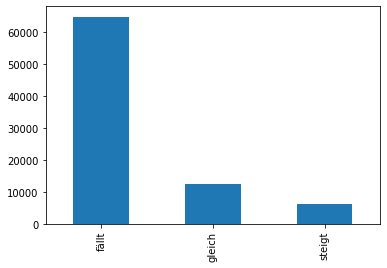

In [198]:
data['Price_Diff_Bin'] = data['Price_Diff'].apply(lambda x: 'fällt' if x<0 else 'gleich' if x==0 else 'steigt')
data['Price_Diff_Bin'].value_counts().plot(kind='bar')

Daten nach prozentualer Differenz zwischen Abfrage- und Bestpreis sortieren.

In [199]:
print(data.sort_values(by=['Price_Diff_%'])) 

                   Request_Date Flight_Date  Departure_hour  \
index                                                         
174   2019-06-03 23:00:00+00:00  2019-06-09               6   
25967 2019-07-14 23:00:00+00:00  2019-07-28               6   
25875 2019-07-22 11:00:00+00:00  2019-07-27              22   
25874 2019-07-21 23:00:00+00:00  2019-07-27              22   
25871 2019-07-20 11:00:00+00:00  2019-07-27              22   
...                         ...         ...             ...   
2071  2019-06-13 11:00:00+00:00  2019-06-18              19   
175   2019-06-04 11:00:00+00:00  2019-06-09               6   
4901  2019-06-21 11:00:00+00:00  2019-06-26               6   
25102 2019-07-22 23:00:00+00:00  2019-07-27               6   
5164  2019-06-19 11:00:00+00:00  2019-06-26              19   

         flight_unique_id route_abb  Price_In_Eur  min_future_price_in_Eur  \
index                                                                        
174    2019-06-09 FR 854

Spalte für die Auswertung hinzufügen als Differenz in Tagen zwischen Abfragedatum und Flugdatum.

In [200]:
data['Request_Date_w/o_Time'] = pd.to_datetime(data['Request_Date']).dt.date
data['Days_Remaining'] = (pd.to_datetime(data['Flight_Date']).dt.date - data['Request_Date_w/o_Time']).dt.days
data.drop(['Request_Date_w/o_Time'],1, inplace=True)

In [201]:
data['Days_Remaining'].describe()

count    83624.000000
mean        38.913601
std         22.859873
min          1.000000
25%         20.000000
50%         37.000000
75%         56.000000
max         99.000000
Name: Days_Remaining, dtype: float64

Durchschnittlich liegen zwischen dem Abfragedatum und dem Flug 38 Tage. Der größte Abstand beträgt 99 Tage und der geringste einen Tag. 

### Grafische Analysen

Verteilungsdiagramm für die Anzahl an angefragten Flügen basierend auf deren Abflugsuhrzeit.

C:\Users\Max\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


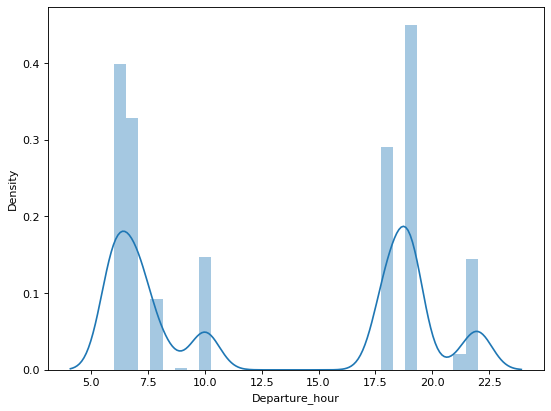

In [202]:
figure(figsize=(8, 6), dpi=80)

sns.distplot(data.Departure_hour)

Verteilungsdiagramm für die angefragten Preise.

C:\Users\Max\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


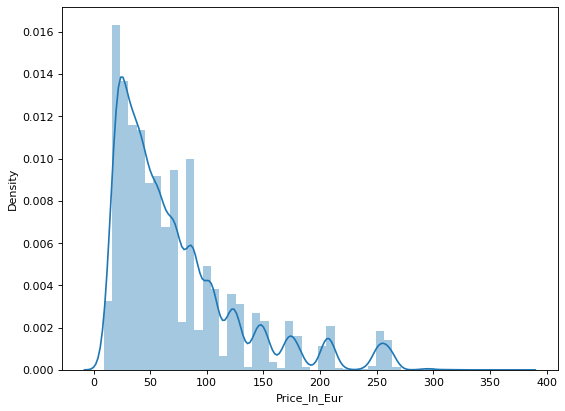

In [203]:
figure(figsize=(8, 6), dpi=80)

sns.distplot(data.Price_In_Eur)

Verteilungsdiagramm für die zukünftigen Bestpreise.

C:\Users\Max\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


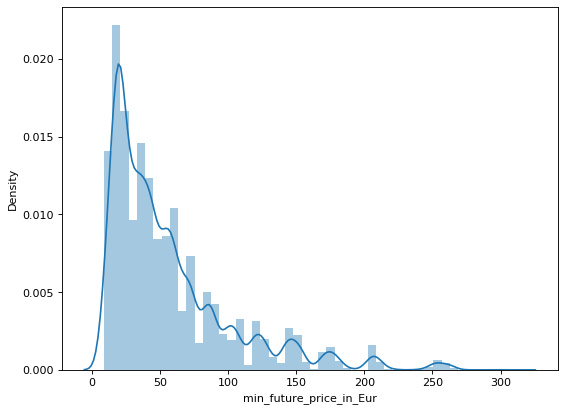

In [204]:
figure(figsize=(8, 6), dpi=80)

sns.distplot(data.min_future_price_in_Eur)

Preisverteilung je Route.

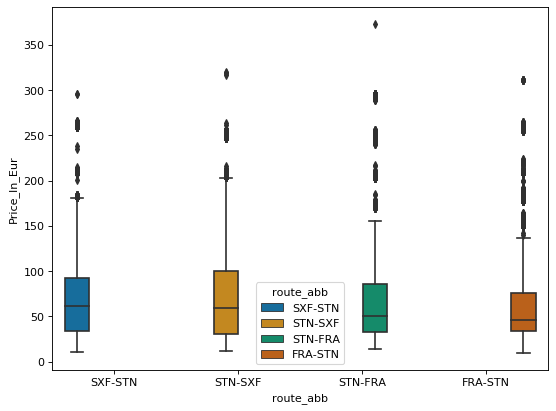

In [205]:
figure(figsize=(8, 6), dpi=80)
sns.boxplot(y='Price_In_Eur', x='route_abb', 
                 data=data, 
                 palette="colorblind",
                 hue='route_abb')

Anzahl Anfragen je Route.

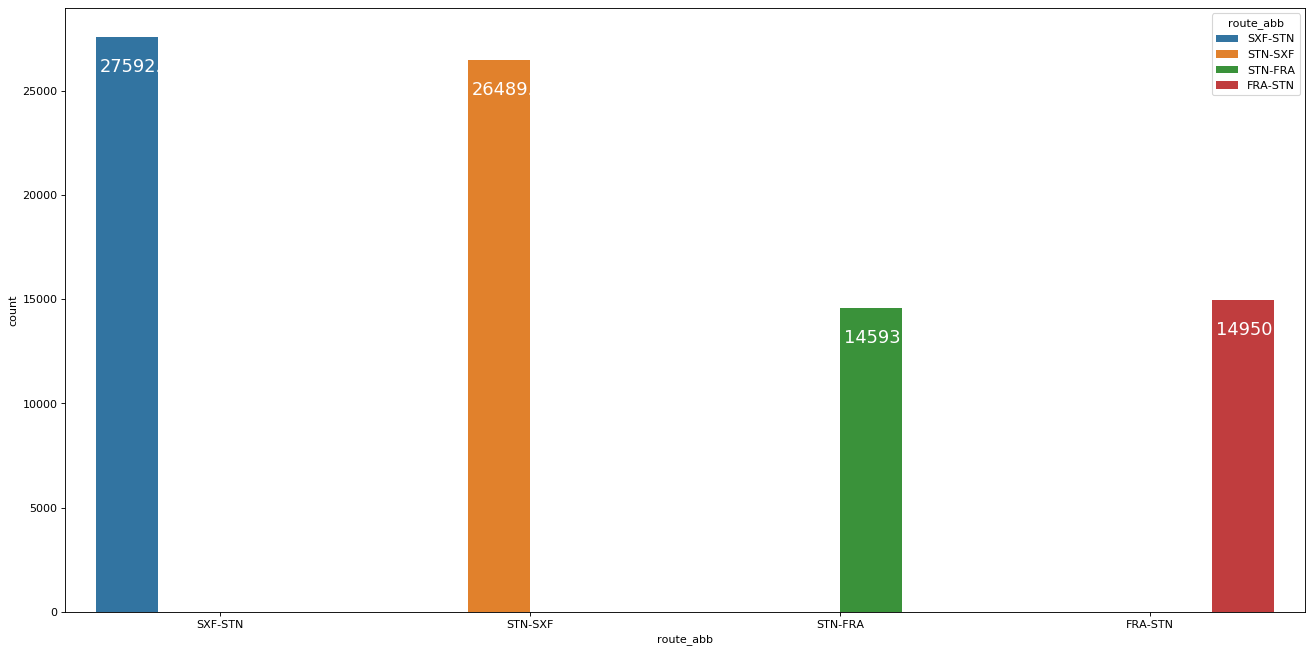

In [206]:
figure(figsize=(20, 10), dpi=80)

ax = sns.countplot(x='route_abb', 
                 data=data,
                 hue='route_abb')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.13, p.get_height()), ha='center', va='top', color='white', size=16)

Anfragen für Flüge pro Tag pro Strecke

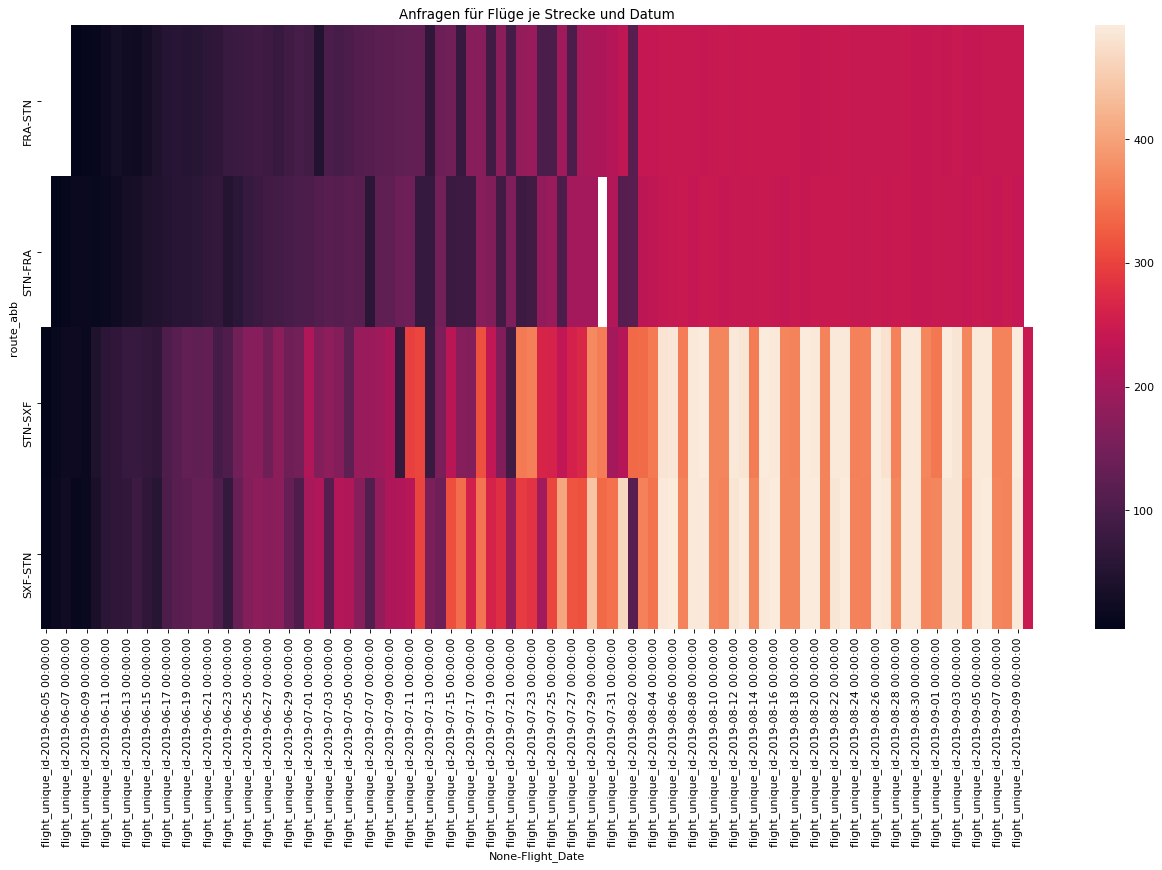

In [207]:
figure(figsize=(20, 10), dpi=80)

heatmap_data = data.groupby(['route_abb', 'Flight_Date'])['flight_unique_id'].count().reset_index().pivot(index='route_abb', columns='Flight_Date')
plt.title('Anfragen für Flüge je Strecke und Datum')
sns.heatmap(data=heatmap_data)

Durchschnittliche Anfragen pro Flug

In [208]:
data.groupby(['flight_unique_id'])['Request_Date'].count().mean()

83.04270109235352

Beispielhafte Nachverfolgung der Entwicklung der abgefragten Preise 

       flight_unique_id  Number_of_Requests
338   2019-07-07 FR 144                  60
319   2019-07-05 FR 145                  60
325  2019-07-05 FR 1687                  60
310   2019-07-04 FR 147                  60
301   2019-07-03 FR 147                  60


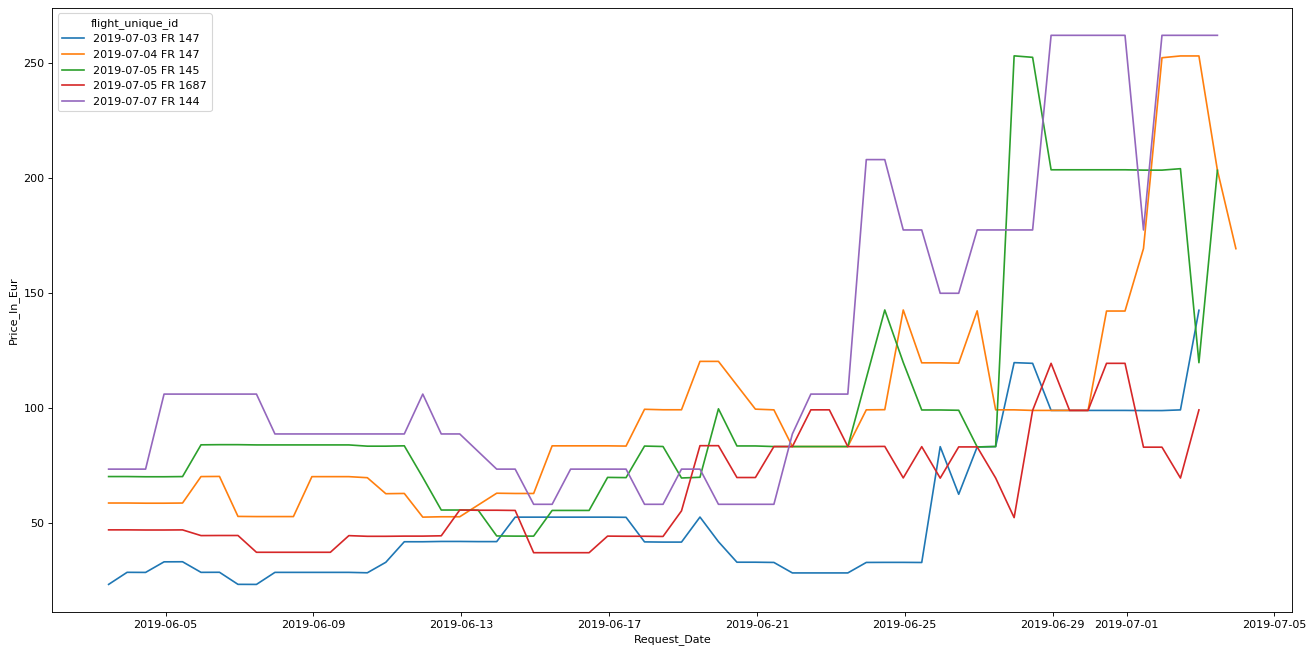

In [209]:
sample = data.groupby(['flight_unique_id'])['Request_Date'].count().reset_index()
sample.columns = ['flight_unique_id', 'Number_of_Requests']
sample = sample[sample['Number_of_Requests'] == 60].sample(5)
print(sample)

example_data = data[data['flight_unique_id'].isin(sample['flight_unique_id'].tolist())]

figure(figsize=(20, 10), dpi=80)
sns.lineplot(x='Request_Date', y='Price_In_Eur', data=example_data, hue='flight_unique_id')


Dazugehörige Entwicklung der min_future_price_in_Eur.

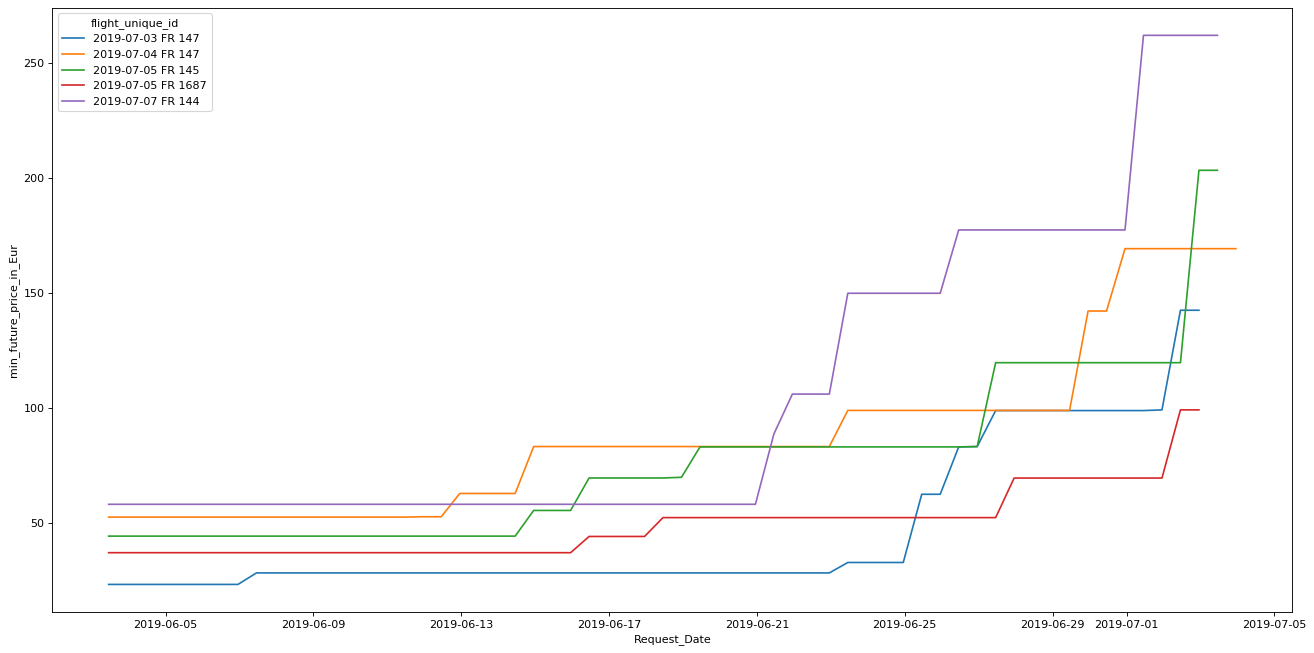

In [210]:
figure(figsize=(20, 10), dpi=80)
sns.lineplot(x='Request_Date', y='min_future_price_in_Eur', data=example_data, hue='flight_unique_id')

Anzahl Flüge je Strecke und Datum

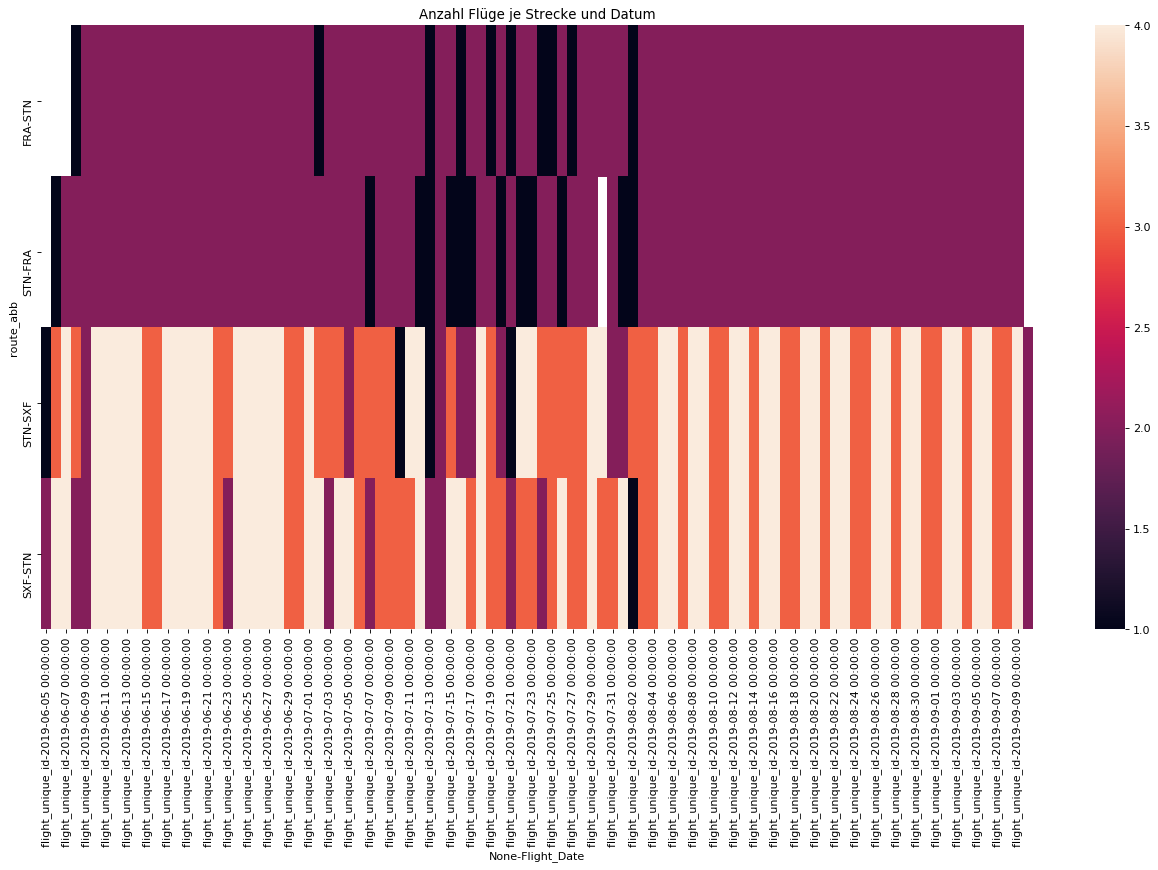

In [211]:
figure(figsize=(20, 10), dpi=80)
filtered_data = data.drop_duplicates(subset=['flight_unique_id'], keep='first')
heatmap_data = filtered_data.groupby(['route_abb', 'Flight_Date'])['flight_unique_id'].count().reset_index().pivot(index='route_abb', columns='Flight_Date')
plt.title('Anzahl Flüge je Strecke und Datum')
sns.heatmap(data=heatmap_data)

Es ist besonders auf den London-Berlin Strecken eine starke wöchentliche Schwankung zu erkennen. 

Preisdifferenz zwischen Abfragepreis und zukünftigem Bestpreis nach Anzahl der bis zum Flug verbleibenden Tage.

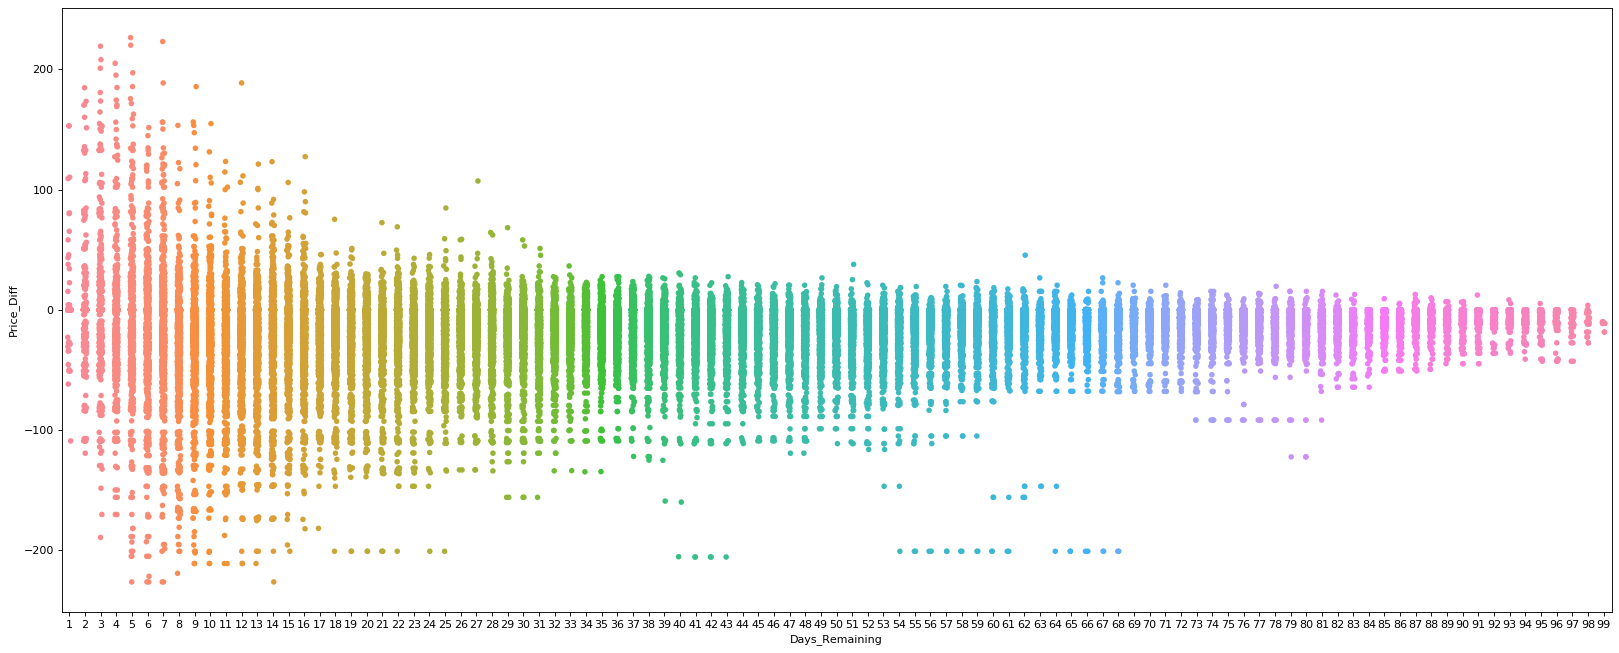

In [212]:
figure(figsize=(25, 10), dpi=80)
sns.stripplot(x='Days_Remaining', y='Price_Diff', data=data)

Die Streuung der Preisdifferenz nimmt mit zunehmender Nähe zum Datum des Fluges deutlich zu.  

Genauere Betrachtung des wöchentlichen Musters.

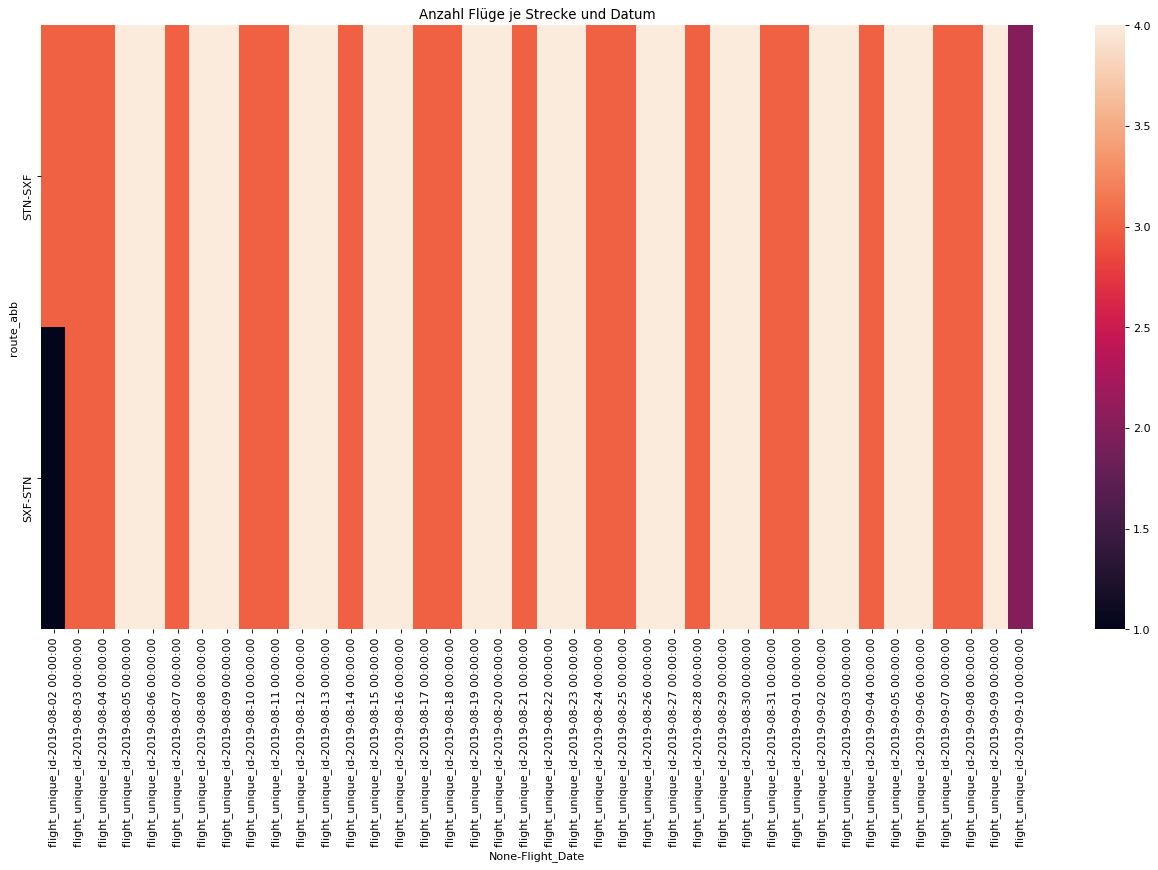

In [213]:
figure(figsize=(20, 10), dpi=80)
filtered_data = data.drop_duplicates(subset=['flight_unique_id'], keep='first')
filtered_data = filtered_data[ (filtered_data['route_abb'] == 'SXF-STN') |  (filtered_data['route_abb'] == 'STN-SXF') ]
filtered_data = filtered_data[filtered_data['Flight_Date'] > '2019-08-01']
heatmap_data = filtered_data.groupby(['route_abb', 'Flight_Date'])['flight_unique_id'].count().reset_index().pivot(index='route_abb', columns='Flight_Date')
plt.title('Anzahl Flüge je Strecke und Datum')
hm = sns.heatmap(data=heatmap_data)
hm.get_figure().savefig('E:\Downloads\DataMining_Wait_or_Buy\Flüge je Strecke je Tag')

Anzahl der Flüge je Stunde. Dabei fällt auf, dass keine Verbindungen zwischen 10 und 18 Uhr existieren.

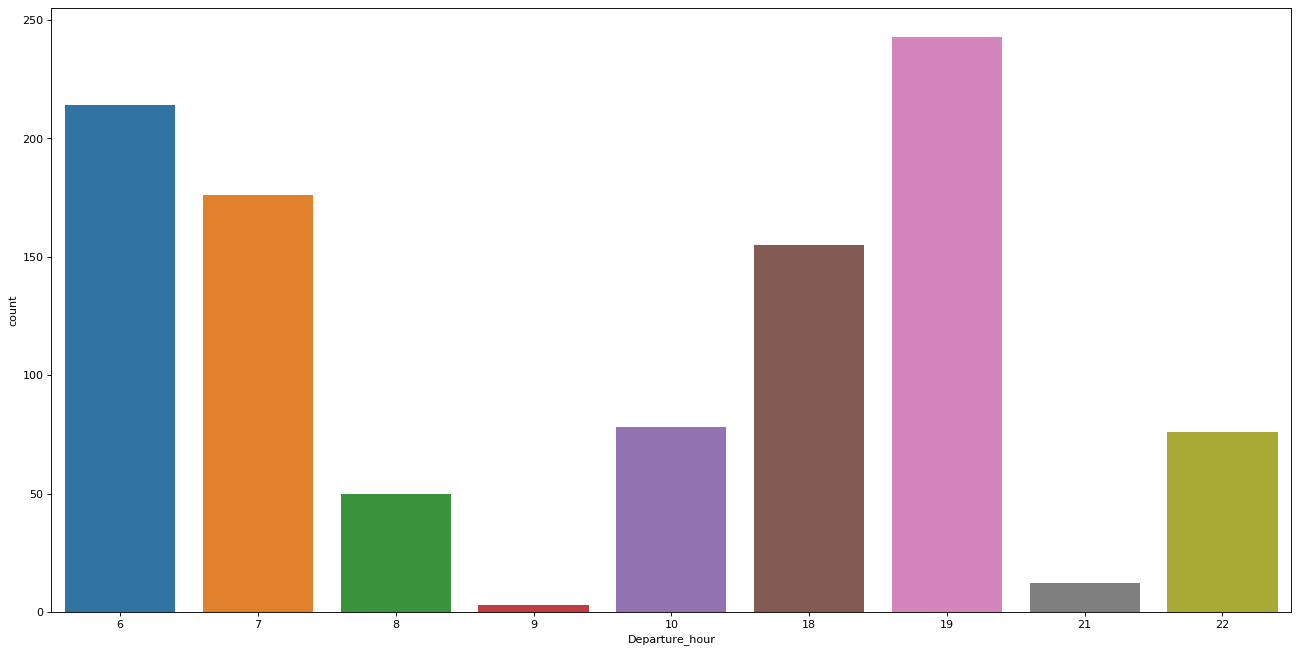

In [216]:
figure(figsize=(20, 10), dpi=80)

filtered_data = data.drop_duplicates(subset=['flight_unique_id'], keep='first')

sns.countplot(x='Departure_hour', data=filtered_data)

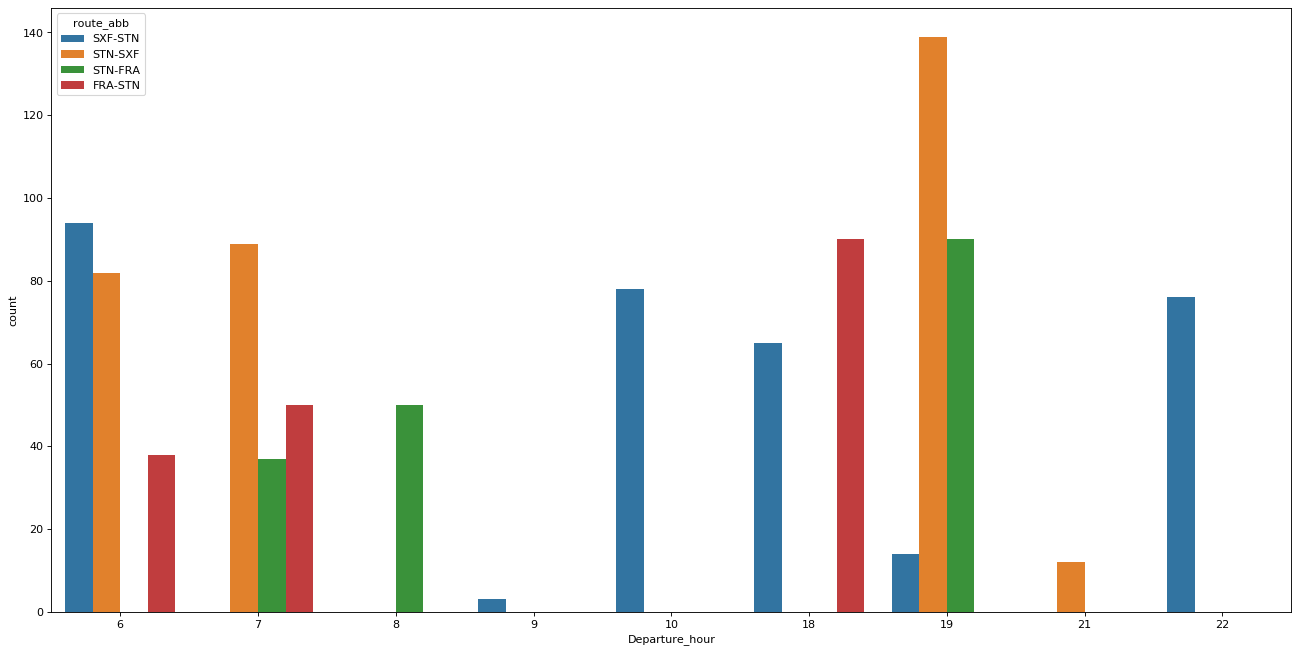

In [217]:
figure(figsize=(20, 10), dpi=80)

filtered_data = data.drop_duplicates(subset=['flight_unique_id'], keep='first')

sns.countplot(x='Departure_hour', data=filtered_data, hue='route_abb')

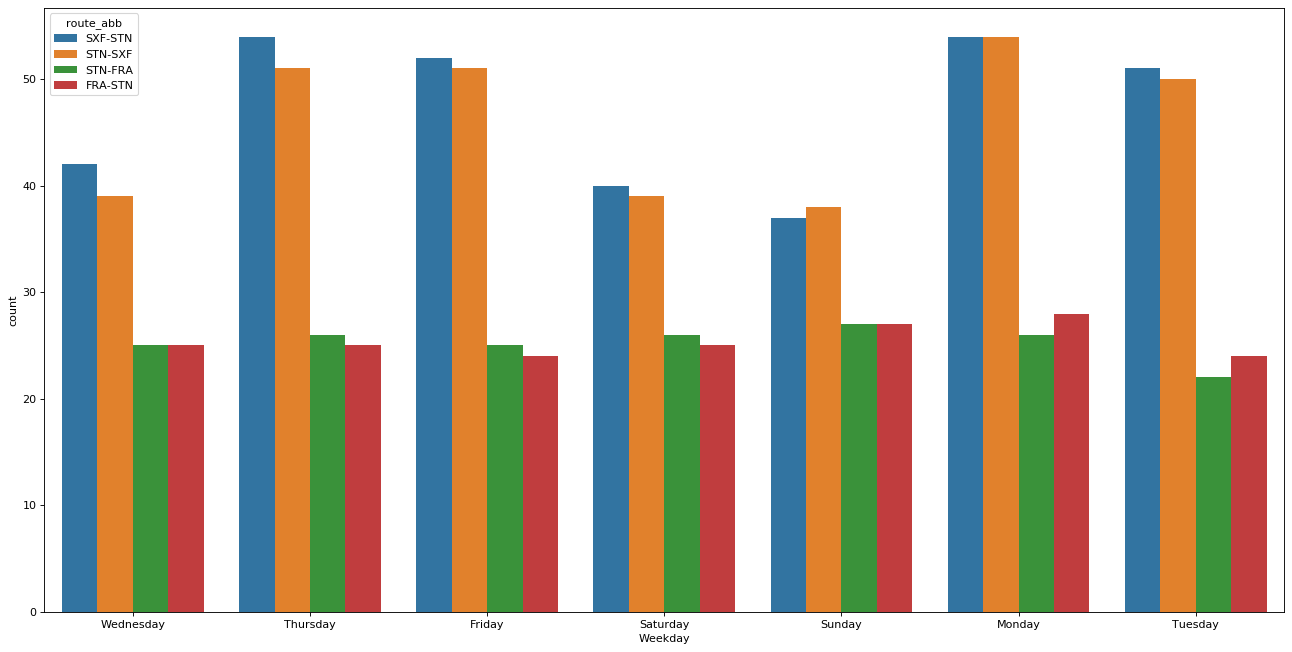

In [243]:
figure(figsize=(20, 10), dpi=80)

filtered_data = data.drop_duplicates(subset=['flight_unique_id'], keep='first')

sns.countplot(x='Weekday', data=filtered_data, hue='route_abb')

Durchschnittliche Ticketpreise je Strecke und Datum

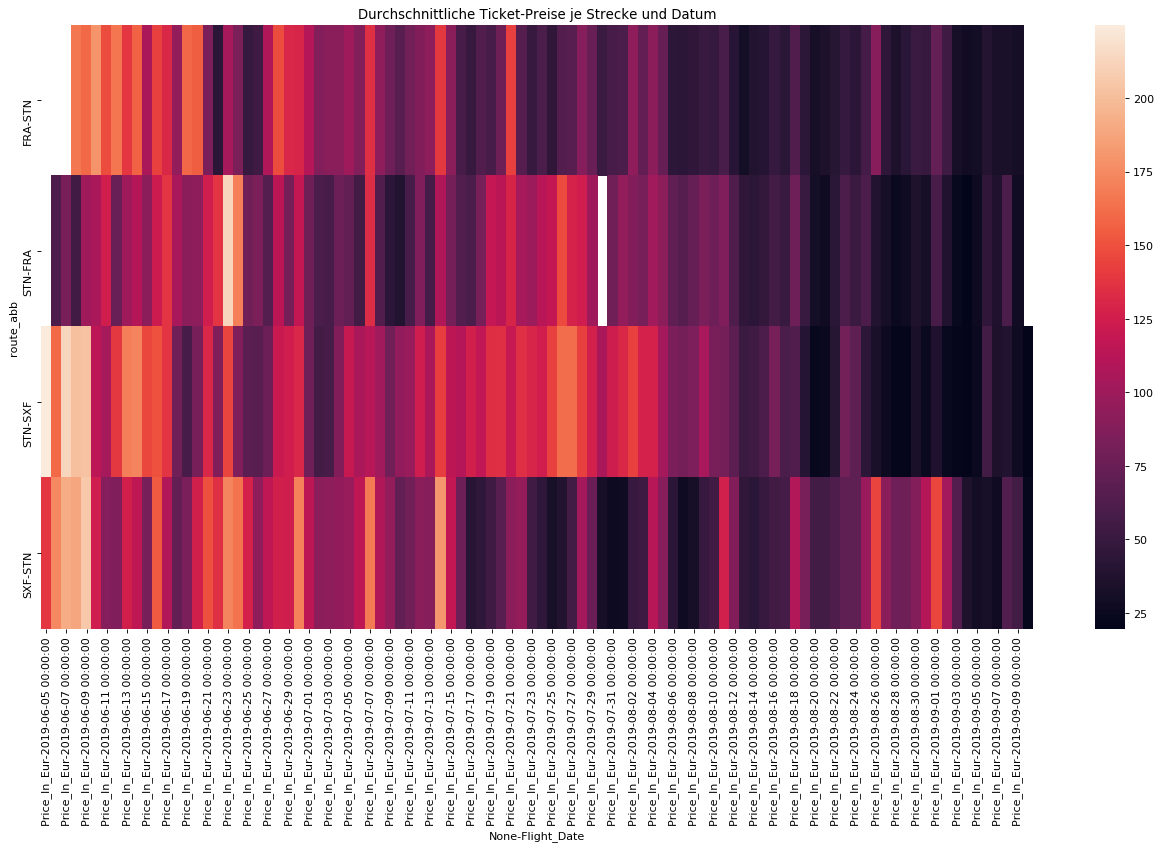

In [220]:
figure(figsize=(20, 10), dpi=80)
heatmap_data = data.groupby(['route_abb', 'Flight_Date'])['Price_In_Eur'].mean().reset_index().pivot(index='route_abb', columns='Flight_Date')
plt.title('Durchschnittliche Ticket-Preise je Strecke und Datum')
plt.ylabel('Ticket-Preis in Eur')
sns.heatmap(data=heatmap_data)

Anzahl Flüge je Stunde

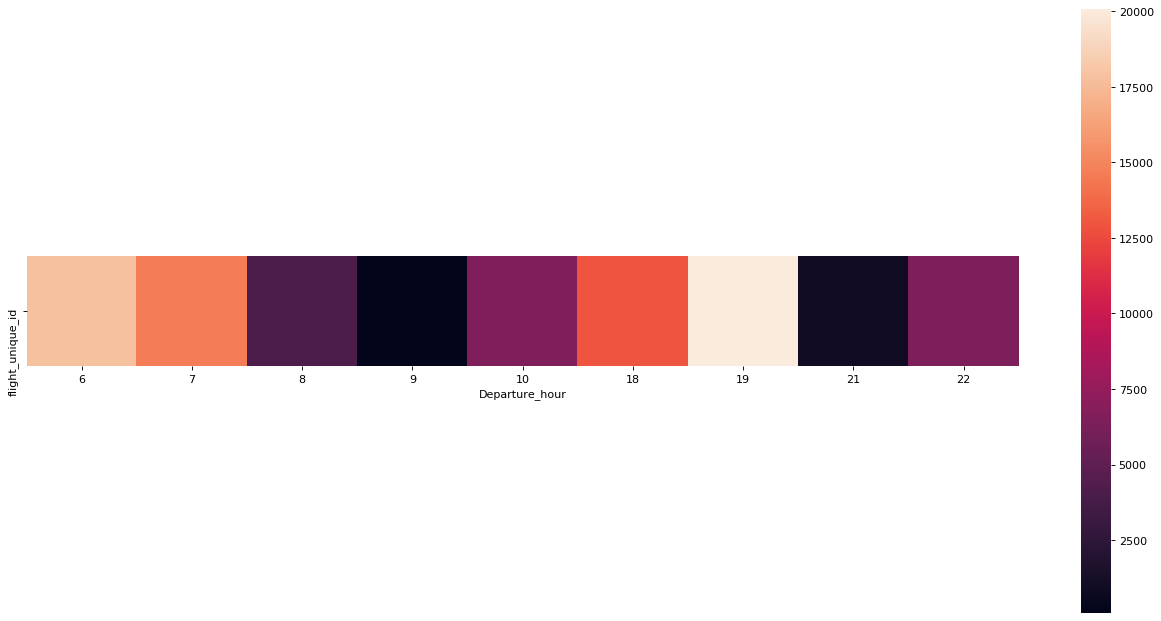

In [221]:
figure(figsize=(20, 10), dpi=80)
heatmap_data = pd.DataFrame(data.groupby(['Departure_hour'])['flight_unique_id'].count()).T
sns.heatmap(data=heatmap_data, square=True)

Durchschnittlicher Ticketpreis je Stunde

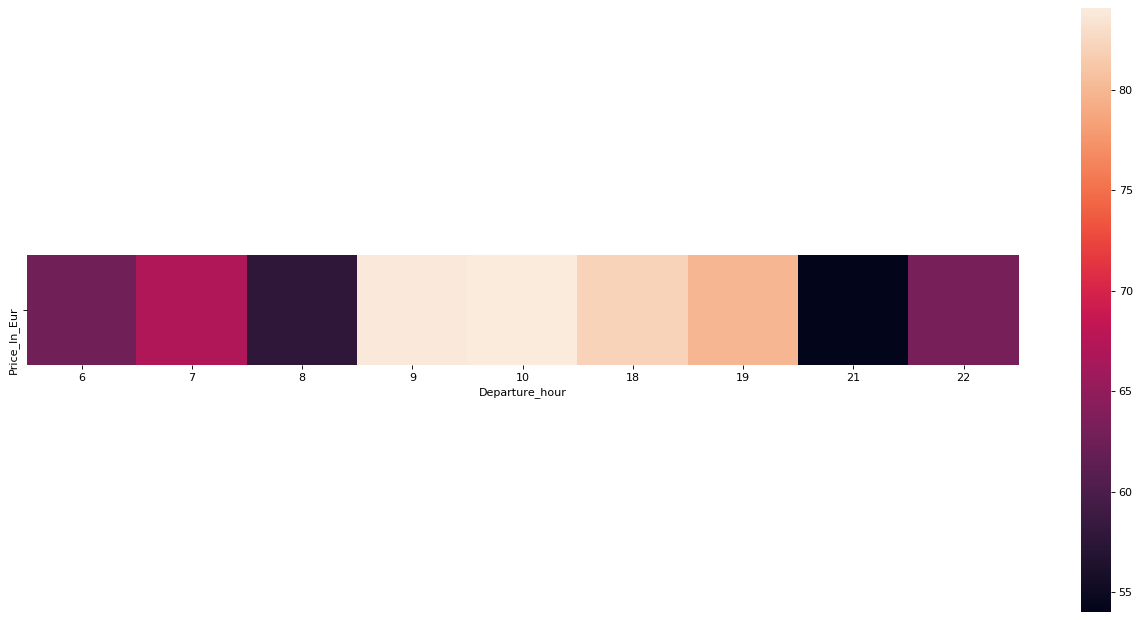

In [222]:
figure(figsize=(20, 10), dpi=80)
heatmap_data = pd.DataFrame(data.groupby(['Departure_hour'])['Price_In_Eur'].mean()).T
sns.heatmap(data=heatmap_data, square=True)

Abfragepreise je Strecke

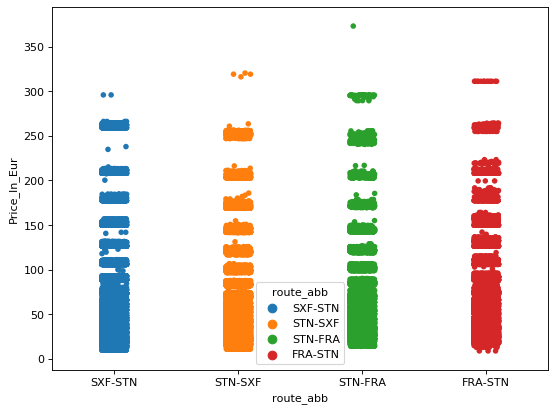

In [224]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

sns.stripplot(y='Price_In_Eur', x='route_abb', 
                 data=data, 
                 jitter=True,
                 hue='route_abb')

Boxplot der Abfragepreise

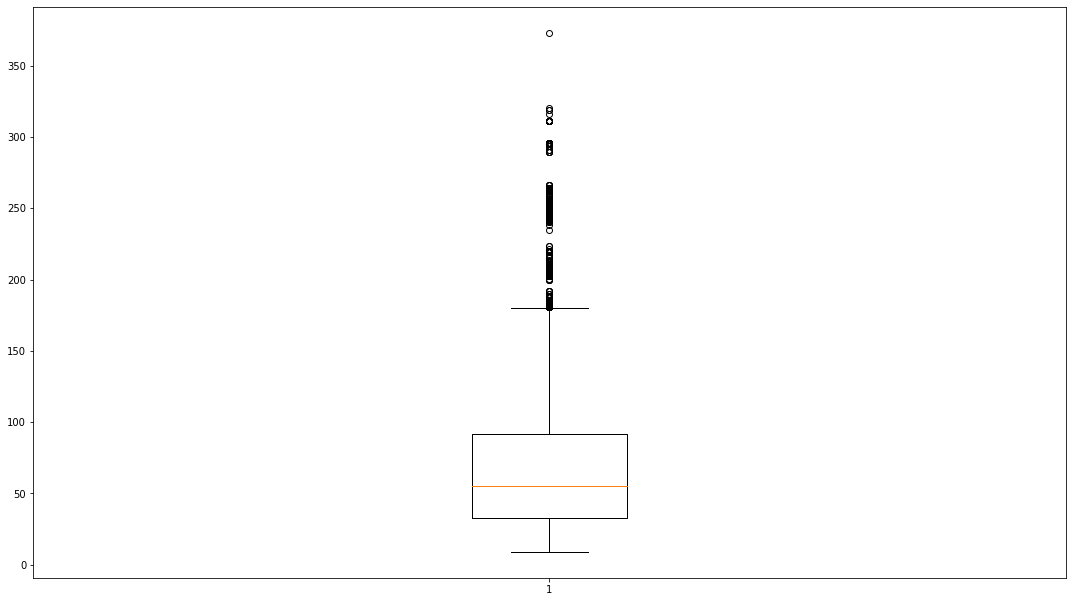

In [225]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.boxplot(data['Price_In_Eur'])
plt.show()

Anzahl Anfragen je Route

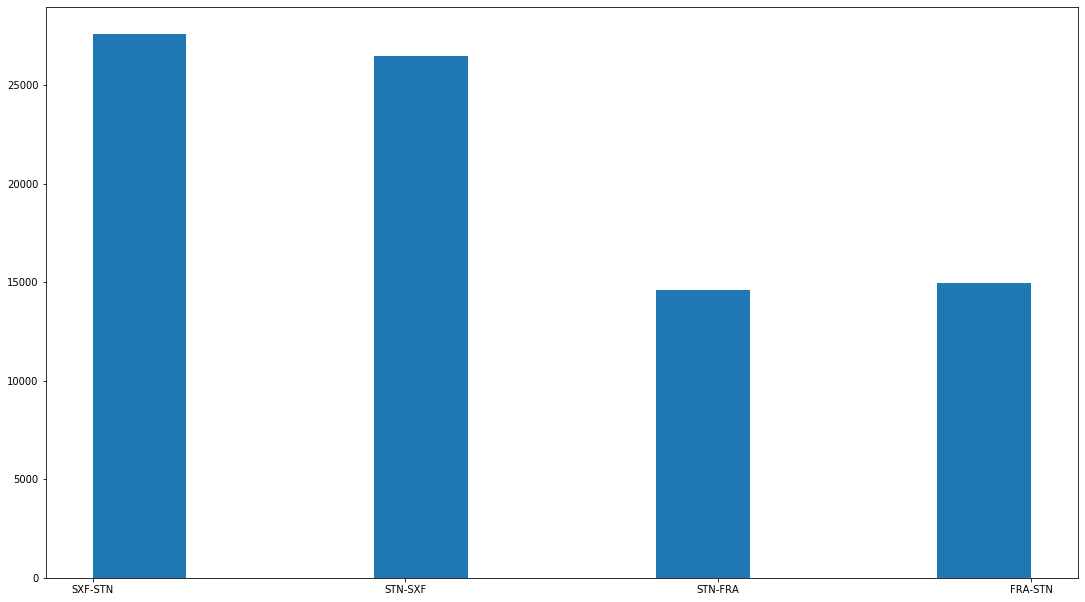

In [227]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.hist(data['route_abb'])
plt.show()

Anzahl Anfragen je Datum

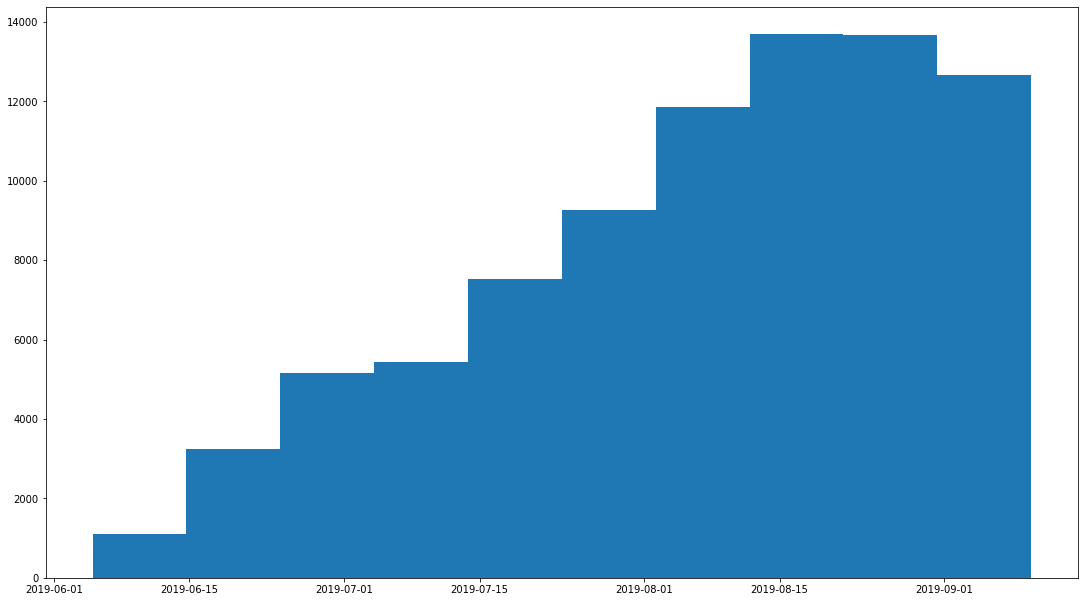

In [238]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.hist(data['Flight_Date'])
plt.show()

<Figure size 1600x800 with 0 Axes>

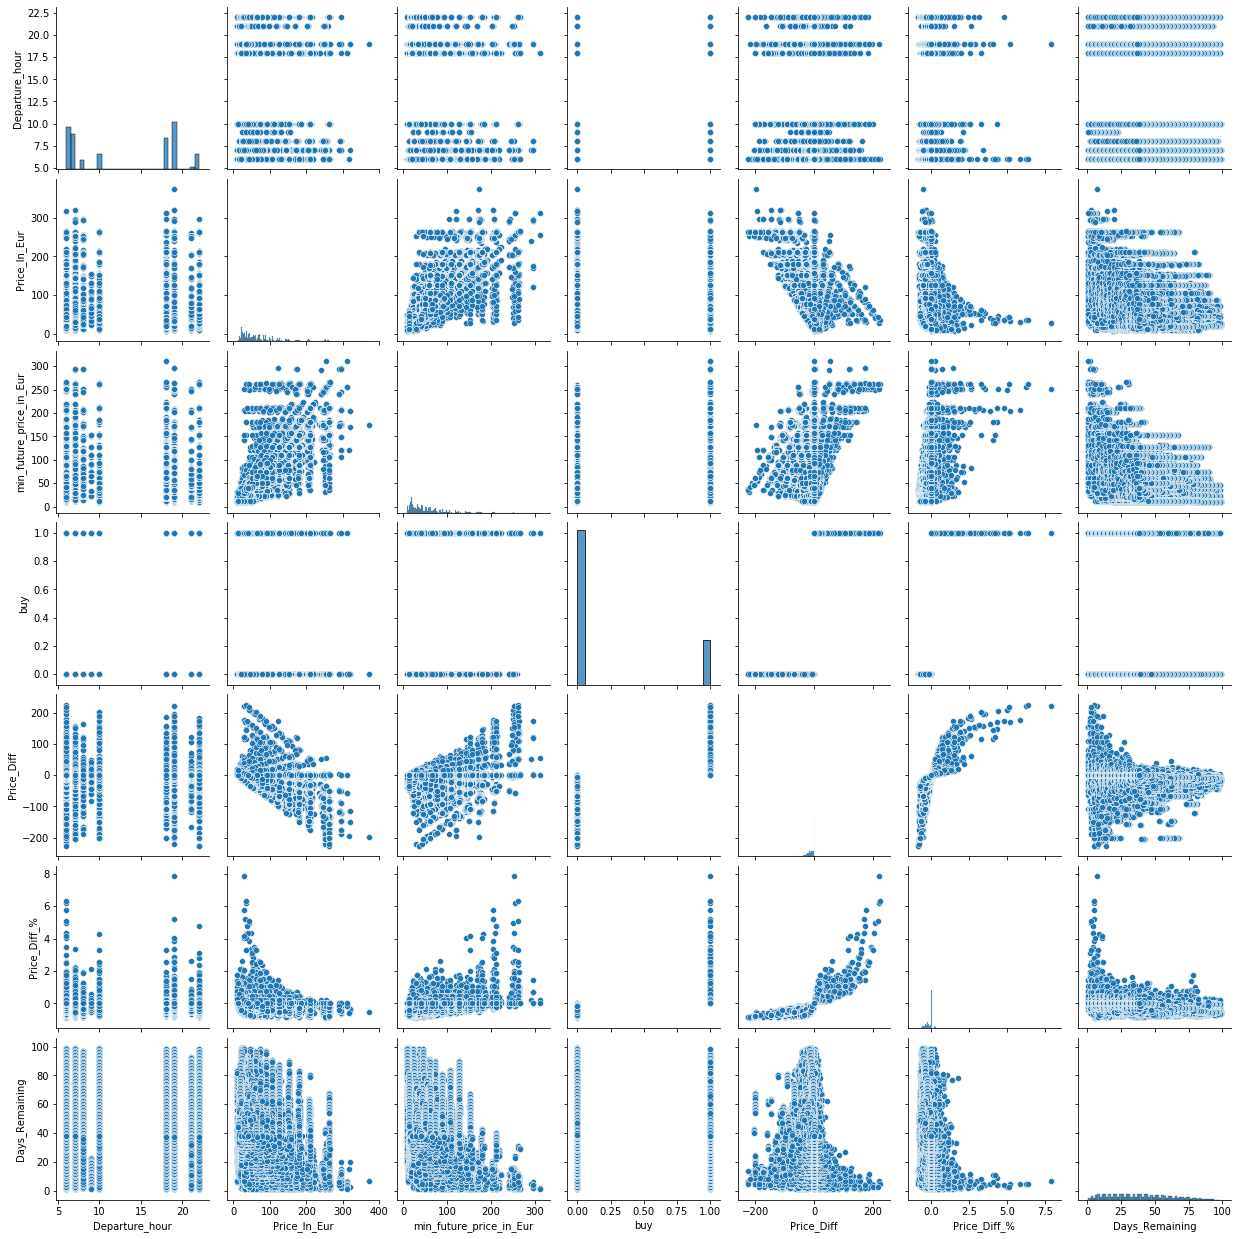

In [230]:
figure(figsize=(20, 10), dpi=80)
sns.pairplot(data)

Korrelationsmatrix

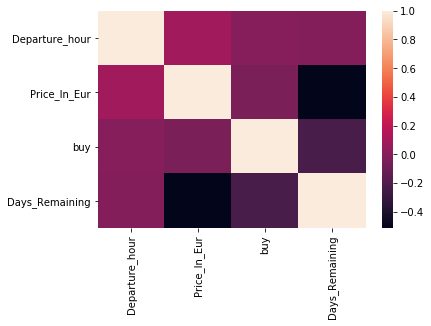

In [231]:
filtered_data = data[['Departure_hour', 'Price_In_Eur', 'buy', 'route_abb', 'Days_Remaining']]
sns.heatmap(filtered_data.corr())

## 3. Feature Engineering

Für eine optimale Vorhersage wären natürlich Informationen zur Anzahl tatsächlich verfügbarer Sitzplätze oder detailiertere Informationen zu verkauften Ticket-Typen (Business Class, Economy Class, Geschäftsreisende, etc. - wenn auch vermutlich auf kürzeren Strecken wie denen im Datensatz weniger relevant) hilfreich, die jedoch typischerweise nicht öffentlich verfügbar sind (vgl. Manolis Papadakis 2021: Predicting Airfare Prices, S. 1. http://cs229.stanford.edu/proj2012/Papadakis-PredictingAirfarePrices.pdf Letzter Zugriff: 06.12.2021).

In [232]:
data.skew()

Departure_hour             0.073554
Price_In_Eur               1.569332
min_future_price_in_Eur    1.777235
buy                        1.325149
Price_Diff                -1.506706
Price_Diff_%               3.176189
Days_Remaining             0.356978
dtype: float64

Die Verteilung der Features (mit Ausnahme der Preisbasierten Spalten) zeigt mit Werten zwischen -0,5 und 0,5 keine Hinweise auf deutlich asymetrische Verteilungen (vgl. https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de) . Grundsätzlich besteht bei den vorhandenen Features keine Notwendigkeit zur Normalisierung. Nur kategorische Werte müssen für die Verwendung in den Modellen noch codiert werden.

Über die bestehenden Features hinaus werden folgende Features für die Vorhersage ergänzt:

- Wochentag
- Tage bis zum Flug
- Tage bis zum nächsten Feiertag

Ob diese Features einen tatsächlichen Mehrwert für die Vorhersage liefern, muss im zweiten Teil der Projektarbeit ermittelt werden.

In [234]:
# Relevante Feiertage im Zeitraum der Daten, die in Berlin und oder Frankfurt gelten
# sowie Public Holidays in Großbritannien. 
feiertage = {
    '2019-06-09':'Pfingstsonntag',
    '2019-06-10':'Pfingstmontag',
    '2019-06-20':'Fronleichnam',
    '2019-06-20':'Schulferien Beginn',
    '2019-08-02':'Schulferien Ende',
    '2019-08-26':'Summer Bank Holidays',
    '2019-07-15':'School Summer Holidays Beginn',
    '2019-09-06':'School Summer Holidays End'}

feiertage_df = pd.DataFrame(feiertage.items(), columns=['Datum_Feiertag', 'Feiertag_Bezeichnung'])
feiertage_df['Datum_Feiertag'] = pd.to_datetime(feiertage_df['Datum_Feiertag'])

In [235]:
from datetime import datetime

day_diff_list = []
for index, row in feiertage_df.iterrows():
    day_diff_list.append(abs((data['Flight_Date'] - row['Datum_Feiertag']).dt.days))

In [236]:
feiertage_diff_df = pd.concat(day_diff_list, axis=1)
feiertage_diff_df = feiertage_diff_df.min(axis=1)
feiertage_diff_df = feiertage_diff_df.reset_index().drop('index', 1)
feiertage_diff_df.columns = ['Days_Untill_Event']

data = pd.concat([data.reset_index(), feiertage_diff_df], axis=1)
data = data.drop('index', 1)
data

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,Price_In_Eur,min_future_price_in_Eur,buy,Price_Diff,Price_Diff_%,Price_Diff_Bin,Days_Remaining,Days_Untill_Event
0,2019-06-03 11:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,208.07,259.07,1,51.00,0.245110,steigt,2,4
1,2019-06-03 23:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1,0.00,0.000000,gleich,2,4
2,2019-06-04 11:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1,0.00,0.000000,gleich,1,4
3,2019-06-04 23:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1,0.00,0.000000,gleich,1,4
4,2019-06-03 11:00:00+00:00,2019-06-05,21,2019-06-05 FR 147,STN-SXF,143.86,251.72,1,107.86,0.749757,steigt,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83619,2019-08-01 11:00:00+00:00,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,35.69,39.69,1,4.00,0.112076,steigt,40,4
83620,2019-08-01 23:00:00+00:00,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,46.83,39.69,0,-7.14,-0.152466,fällt,40,4
83621,2019-08-02 11:00:00+00:00,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,46.83,39.69,0,-7.14,-0.152466,fällt,39,4
83622,2019-08-02 23:00:00+00:00,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,39.69,39.69,1,0.00,0.000000,gleich,39,4


## 4. Praktische Überlegungen

### Falsche Empfehlungen sollten unterschiedliche Gewichtung haben:
Wenn empfohlen wird zu warten, sollte der Preis möglichst nie steigen. Es muss auch verhindert werden, dass dann plötzlich kein Sitz mehr frei ist. (false negative)
<br><br> Wenn empfohlen wird zu kaufen, und der Preis doch noch sinkt, ist das zwar ärgerlich für den Kunden aber verkraftbar. (false positive) <br>
Unmoralisch betrachtet ist auch die Wahrscheinlichkeit, das der Kunde davon erfährt, eher gering.

### Mögliche Maßnahmen als Anbieter einer solchen Vorhersage 
Wahrscheinlichkeit ausgeben, mit der der Algorithmus richtig liegt.
Preisgarantie mit Erstattung anbieten, wenn der Preis doch weiter sinkt.
In Hinblick auf die Nutzererfahrung wäre es eventuell ratsam einen prozentualen Grenzwert definieren zu können, sodass auch ein nur minimal geringerer Preis in der Zukunft bereits zu einer sofortigen Kaufempfehlung führt.   